# Video Game Sales Analysis

 Christopher Garcia

**Objective:**

Conduct exploratory data analysis to uncover patterns
things to explore
    - sales generated by different game genre
    - compare sales betwen three different nations

    
add an objective here maybe

Dataset avaiable at:

*https://www.kaggle.com/gregorut/videogamesales*

### [Data Pre-Processing]

In [17]:
# library import
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
# inspect dataset
# identify variable datatypes
df = pd.read_csv('vgsales.csv')

In [4]:
df.head(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# remove missing values
vg_sales = df.dropna()

In [9]:
vg_sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
# convert year value to int
vg_sales['Year'] = vg_sales['Year'].astype(int)

/var/folders/yt/_qmtwkhx1c15y2nt59jllsgr0000gn/T/ipykernel_50597/2917588579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vg_sales['Year'] = vg_sales['Year'].astype(int)


In [14]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [15]:
# summary statistics for quantitative variable
vg_sales.head(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [82]:
vg_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


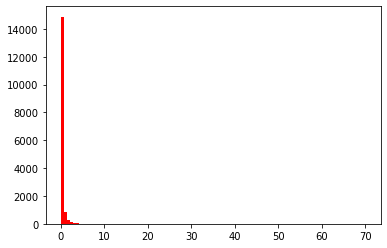

In [49]:
# dist of NA sales
plt.hist(vg_sales['NA_Sales'], range=(0,70), bins=100, color='red')
plt.show()

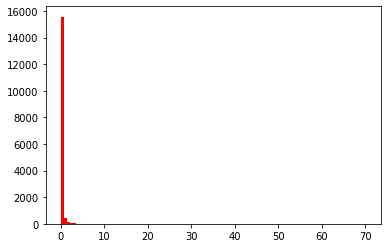

In [51]:
# dist of EU sales
plt.hist(vg_sales['EU_Sales'], range=(0,70), bins=100, color='red')
plt.show()

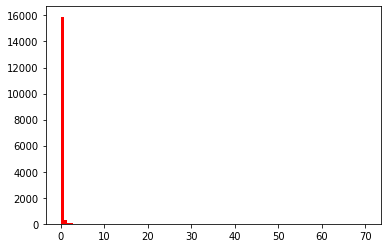

In [53]:
# dist of JP sales
plt.hist(vg_sales['JP_Sales'], range=(0,70), bins=100, color='red')
plt.show()

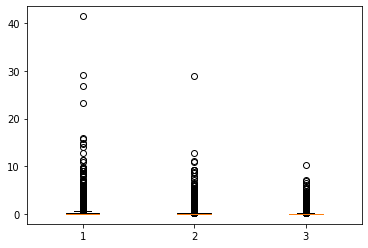

In [56]:
plt.boxplot([vg_sales['NA_Sales'], vg_sales['EU_Sales'], vg_sales['JP_Sales']])
plt.show()

What the distibutions tell us. 

"The histogram displays the distributions of chest pain cost over 2000 hospitals across the US. The average and median costs are blah and blah respectively. Given that the data is unimodal, with one local maximum, and a right skew, the fact that the average is greater than the median matches our expectation

The range costs is very large, blah, with the smallerst equal to blah, and the largesrt to blah./ There is one hospital, "", that charges more than the rest. 
"

We're going to start to visualize some single categorical variables

In [80]:
vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [57]:
# visulize platform
vg_sales['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


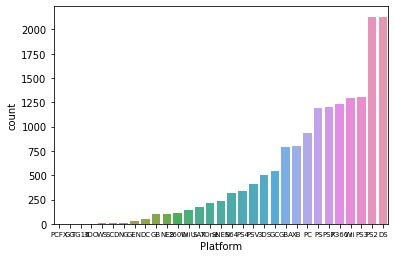

In [73]:
sns.countplot(vg_sales['Platform'], order=vg_sales['Platform'].value_counts(ascending=True).index)
plt.xticks(fontsize=7)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


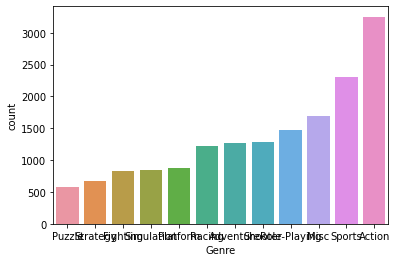

In [77]:
sns.countplot(vg_sales['Genre'], order=vg_sales['Genre'].value_counts(ascending=True).index)
plt.show()